# Model Testing

## Requirements

In [1]:
# Needed Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit Learn imports
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.svm import SVR

In [2]:
# warnings filter
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [3]:
# Prefix for the calibration data to identify the correct file
prefix = "e2e_test3"

# Load the data from the calibrations csv file
df = pd.read_csv(rf"C:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\app\services\calib_validation\csv\data\{prefix}_fixed_train_data.csv")

# Drop the columns that are not needed
df = df.drop(["screen_height", "screen_width"], axis=1)

## Data Exploration

In [4]:
# Shape of the data
df.shape

(720, 6)

In [5]:
# Display the data for the first 5 rows
df.head()

,left_iris_x,left_iris_y,right_iris_x,right_iris_y,point_x,point_y
0,506.971497,282.207611,406.131836,278.658783,100,100
1,518.564636,280.534271,412.582733,279.688538,100,100
2,524.403320,282.937195,417.401550,282.717865,100,100
3,530.841187,287.072388,422.359680,283.891907,100,100
4,534.370300,287.437531,426.682861,285.813660,100,100


In [6]:
# Describe the data to see the statistics
df.describe()

,left_iris_x,left_iris_y,right_iris_x,right_iris_y,point_x,point_y
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,365.496955,328.690510,245.821749,332.613119,768.000000,365.000000
std,171.625348,26.492830,175.055159,26.174230,578.907128,229.656271
min,150.721909,279.046082,32.873291,278.658783,100.000000,100.000000
25%,162.563515,300.021774,40.361696,307.497986,100.000000,100.000000
50%,390.666397,331.088699,259.016006,335.506729,768.000000,365.000000
75%,549.767090,352.795532,437.989388,353.565865,1436.000000,630.000000
max,564.934509,370.810760,451.664612,377.217133,1436.000000,630.000000


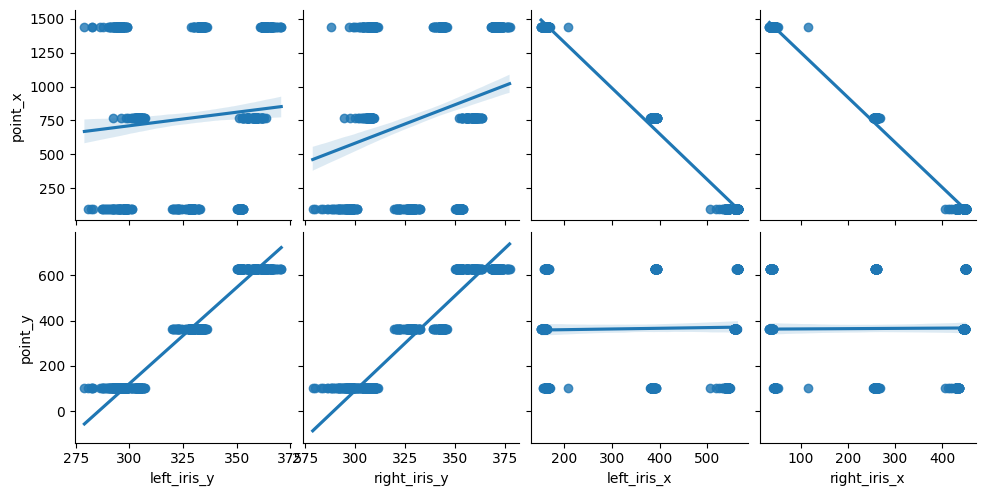

In [7]:
# Regression plot for the data
sns.pairplot(
    df,
    x_vars=["left_iris_y", "right_iris_y", "left_iris_x", "right_iris_x"],
    y_vars=["point_x", "point_y"],
    kind="reg",
)
plt.show()

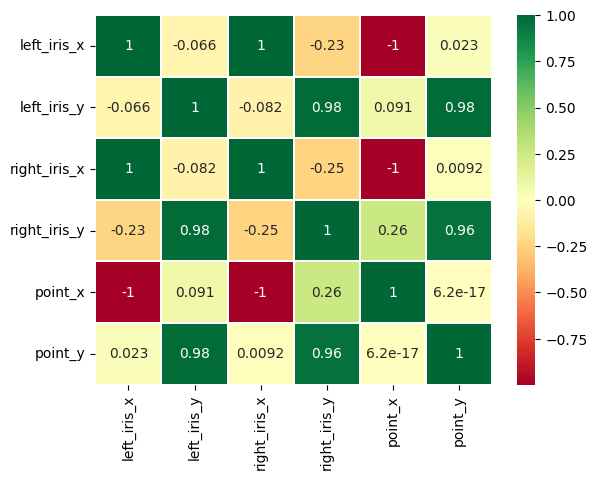

In [8]:
# Heatmap for the correlation of the data
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", linewidths=0.2)
plt.show()

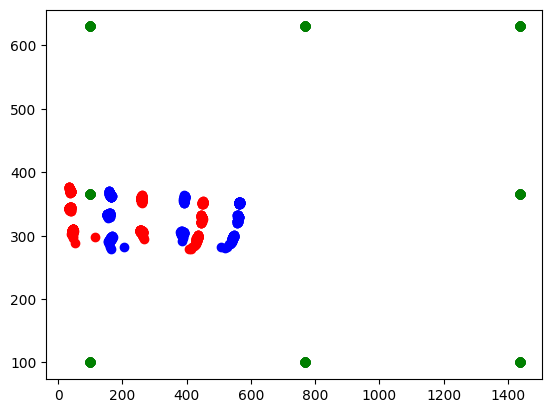

In [9]:
# Plot the data for the left and right iris and the point
plt.scatter(df["left_iris_x"], df["left_iris_y"], color="blue")
plt.scatter(df["right_iris_x"], df["right_iris_y"], color="red")
plt.scatter(df["point_x"], df["point_y"], color="green")
plt.show()

## Model Training

In [10]:
# Left iris X and right iris X
X_x = df[["left_iris_x", "right_iris_x"]]
X_y = df["point_x"]

In [11]:
# Transform the data by standardizing it
sc = StandardScaler()
X_x = sc.fit_transform(X_x)

In [12]:
# Display the data for the first 5 rows after standardizing
X_x[:5]

array([[0.82489499, 0.91640561],
       [0.89249106, 0.95328188],
       [0.92653465, 0.98082844],
       [0.96407189, 1.00917137],
       [0.98464908, 1.03388465]])

In [13]:
# Display first 5 rows
X_y[:5]

0    100
1    100
2    100
3    100
4    100
Name: point_x, dtype: int64

In [14]:
# Split the data into training and testing sets
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(
    X_x, X_y, test_size=0.2, random_state=42
)

In [15]:
# Create a SVR model and fit the data
model_x = make_pipeline(PolynomialFeatures(2), SVR(kernel="linear"))
model_x.fit(X_train_x, y_train_x)

# Predict the data and calculate the r2 score
y_pred_x = model_x.predict(X_test_x)
r2_score(y_test_x, y_pred_x)

0.9961613725956199

In [16]:
# Look at the predicted data
y_pred_x

array([ 786.06817646,  774.16112732,  169.97543307,  100.89124975,
       1423.89137523,  167.92634901,  166.02161111,  112.45139996,
        779.34904981,  764.74057119, 1423.50780012,  759.70612299,
        174.62120954,  122.38562533,  764.06525372,  788.16916383,
        161.36933805, 1428.41975816,  103.13801231,   99.63506207,
        760.68326135,  763.60871109,  177.33607007, 1430.1852322 ,
       1421.98908793,  786.76917174,   99.09670387,  102.13959107,
        107.74679153,  113.51843804,  765.96773821,  764.59866928,
        787.03137631,  766.4524878 , 1446.02493565, 1436.67715617,
       1421.82373044, 1445.77717367, 1442.54420182, 1422.28241681,
        776.17737048,  114.57451133,  171.12398447, 1426.87564021,
        763.93598843,  166.93101567,  789.57658774, 1433.07580019,
       1433.696823  ,  167.75862327, 1418.81230066, 1432.79231492,
        756.96248244, 1430.78491926,  109.28163314,  776.03060028,
        101.90368919,   99.89096906,  167.04919653,  787.09657

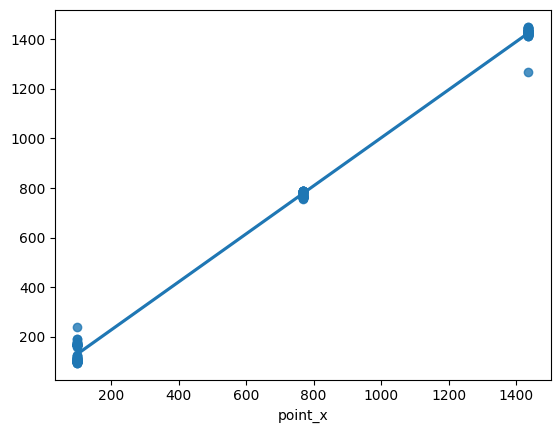

In [17]:
# Plot the data
sns.regplot(x=y_test_x, y=y_pred_x)
plt.show()

In [18]:
# Left iris Y and right iris Y
X_y = df[["left_iris_y", "right_iris_y"]]
y_y = df["point_y"]

In [19]:
# Transform the data by standardizing it
sc = StandardScaler()
X_y = sc.fit_transform(X_y)

In [20]:
# Display the data for the first 5 rows after standardizing
X_y[:5]

array([[-1.75576606, -2.06278627],
       [-1.81897195, -2.02341661],
       [-1.728208  , -1.90759914],
       [-1.57201225, -1.86271308],
       [-1.55821997, -1.78924048]])

In [21]:
# Display first 5 rows
y_y[:5]

0    100
1    100
2    100
3    100
4    100
Name: point_y, dtype: int64

In [22]:
# Split the data into training and testing sets
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(
    X_y, y_y, test_size=0.2, random_state=42
)

In [23]:
# Create a SVR model and fit the data
model_y = make_pipeline(PolynomialFeatures(2), SVR(kernel="linear"))
model_y.fit(X_train_y, y_train_y)

# Predict the data and calculate the r2 score
y_pred_y = model_y.predict(X_test_y)
r2_score(y_test_y, y_pred_y)

0.9456979902446316

In [24]:
# Look at the predicted data
y_pred_y

array([167.24704403, 147.57189819,  96.43602343, 542.75354681,
        50.63898134, 110.68899627, 106.98656955, 358.34588604,
       163.39465024, 594.96665535, 624.53630295, 618.98636251,
        86.94829389, 299.86834513, 595.46795559, 168.10352024,
       118.67347325, 431.52192945, 537.38300556, 535.6244927 ,
       621.07478963, 554.29994981,  74.93587593, 635.2230296 ,
       124.27884373, 162.07453039, 541.23069001, 538.93990105,
       339.83045969, 348.20521822, 588.3756925 , 544.74820729,
       156.92353993, 566.77476522, 410.11203721, 683.12824096,
       631.35054651, 421.6438783 , 416.1310996 , 119.63038418,
       154.23903683, 346.97858209,  93.64383376, 640.71732205,
       582.36577712,  99.57021438, 170.15476265, 427.13960383,
       662.03897297, 105.18201667, 143.51769748, 639.99738366,
       603.11715806, 389.77640643, 352.8206183 , 169.04518056,
       538.71511892, 533.88775644, 110.31668333, 168.47878744,
       141.30325282,  32.57508055, 105.16473031, 593.85

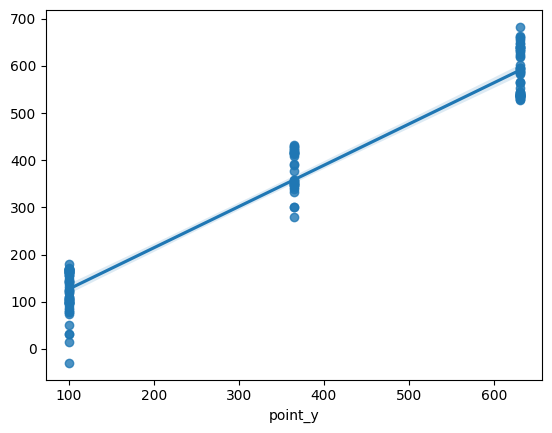

In [25]:
# Plot the data
sns.regplot(x=y_test_y, y=y_pred_y)
plt.show()

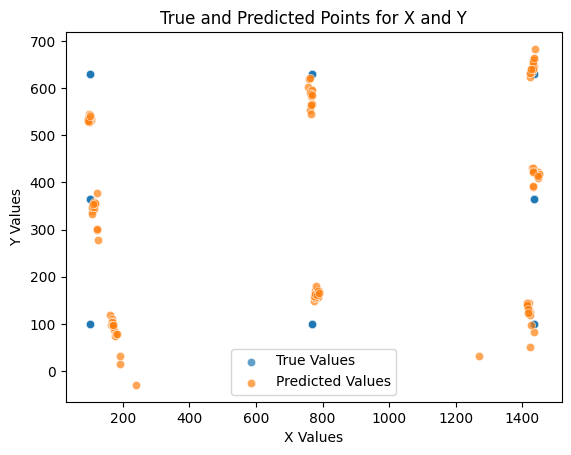

In [26]:
# Data dictionary for the true and predicted values
data = {
    "True X": y_test_x,
    "Predicted X": y_pred_x,
    "True Y": y_test_y,
    "Predicted Y": y_pred_y,
}

# Scatter plot for the true and predicted values
sns.scatterplot(x="True X", y="True Y", data=data, label="True Values", alpha=0.7)
sns.scatterplot(
    x="Predicted X", y="Predicted Y", data=data, label="Predicted Values", alpha=0.7
)

# Plot title and labels
plt.title("True and Predicted Points for X and Y")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()

# Show the plot
plt.show()

In [27]:
# Create a new dataframe with the True X and Y values
df_data = pd.DataFrame(data)
df_data["True XY"] = list(zip(df_data["True X"], df_data["True Y"]))

In [28]:
# Display the data
df_data

,True X,Predicted X,True Y,Predicted Y,True XY
340,768,786.068176,100,167.247044,"(768, 100)"
290,768,774.161127,100,147.571898,"(768, 100)"
54,100,169.975433,100,96.436023,"(100, 100)"
198,100,100.891250,630,542.753547,"(100, 630)"
453,1436,1423.891375,100,50.638981,"(1436, 100)"
...,...,...,...,...,...
164,100,114.912151,365,355.180105,"(100, 365)"
165,100,116.089554,365,357.144988,"(100, 365)"
199,100,102.114669,630,540.355085,"(100, 630)"
132,100,111.623233,365,353.218472,"(100, 365)"


In [29]:
# Only 5 rows
df_data.head()

,True X,Predicted X,True Y,Predicted Y,True XY
340,768,786.068176,100,167.247044,"(768, 100)"
290,768,774.161127,100,147.571898,"(768, 100)"
54,100,169.975433,100,96.436023,"(100, 100)"
198,100,100.891250,630,542.753547,"(100, 630)"
453,1436,1423.891375,100,50.638981,"(1436, 100)"


In [30]:
# Shape of the data
df_data.shape

(144, 5)

In [31]:
# Let's filter the data to remove the unwanted values
df_data = df_data[(df_data["Predicted X"] >= 0) & (df_data["Predicted Y"] >= 0)]
df_data = df_data[
    (abs(df_data["Predicted X"] - df_data["True X"]) <= 100)
    & (abs(df_data["Predicted Y"] - df_data["True Y"]) <= 100)
]

In [32]:
# Shape of the data
df_data.shape

(141, 5)

In [33]:
# Precision is calculated via the Root Mean Square from the
# successive data points [in degrees of visual angle θi between
# successive (x1,y1) to (xi+1, yi+1) samples], both for each eye
# individually and as a mean from the two

# Another option to describe the variation in the data is to
# measure the standard deviation of the data set, equivalent
# to the RMS normalized by the mean


def func_x(group):
    """
    Calculate the root mean square error between the predicted X and true X values.

    Args:
        group (pandas.DataFrame): A DataFrame containing the predicted X and true X values.

    Returns:
        float: The root mean square error between the predicted X and true X values.
    """
    return np.sqrt(np.sum(np.square([group["Predicted X"], group["True X"]])))


def func_y(group):
    """
    Calculate the root mean square error between the predicted Y values and the true Y values.

    Args:
        group (pandas.DataFrame): A DataFrame containing the predicted Y values and the true Y values.

    Returns:
        float: The root mean square error between the predicted Y values and the true Y values.
    """
    return np.sqrt(np.sum(np.square([group["Predicted Y"], group["True Y"]])))


# Calculate the precision for the X and Y values
precision_x = df_data.groupby("True XY").apply(func_x)
precision_y = df_data.groupby("True XY").apply(func_y)

# Calculate the mean precision for the X and Y values
precision_xy = (precision_x + precision_y) / 2
precision_xy = precision_xy / np.mean(precision_xy)

print("mean", precision_xy)

mean True XY
(100, 100)     0.242163
(100, 365)     0.412466
(100, 630)     0.648346
(768, 100)     0.927538
(768, 630)     1.229444
(1436, 100)    1.204913
(1436, 365)    1.537352
(1436, 630)    1.797777
dtype: float64


In [34]:
# Create a dictionary to store the data
data = {}

# Iterate over df_data to get the data
for index, row in df_data.iterrows():

    # Get the outer and inner keys
    outer_key = str(row["True X"])
    inner_key = str(row["True Y"])

    # If the outer key is not in the data, add it
    if outer_key not in data:
        data[outer_key] = {}

    # Add the data to the dictionary
    data[outer_key][inner_key] = {
        "predicted_x": df_data[
            (df_data["True X"] == row["True X"]) & (df_data["True Y"] == row["True Y"])
        ]["Predicted X"].values.tolist(),
        "predicted_y": df_data[
            (df_data["True X"] == row["True X"]) & (df_data["True Y"] == row["True Y"])
        ]["Predicted Y"].values.tolist(),
        "PrecisionSD": precision_xy[(row["True X"], row["True Y"])],
    }

In [35]:
# Create an numpy array to store the transposed data
data = np.array([y_pred_x, y_pred_y]).T

In [36]:
# Shape of the data
data.shape

(144, 2)

In [37]:
# Create a KMeans model with 8 clusters
model = KMeans(n_clusters=8, n_init="auto", init="k-means++")

# Fit the data to the model
y_kmeans = model.fit_predict(data)

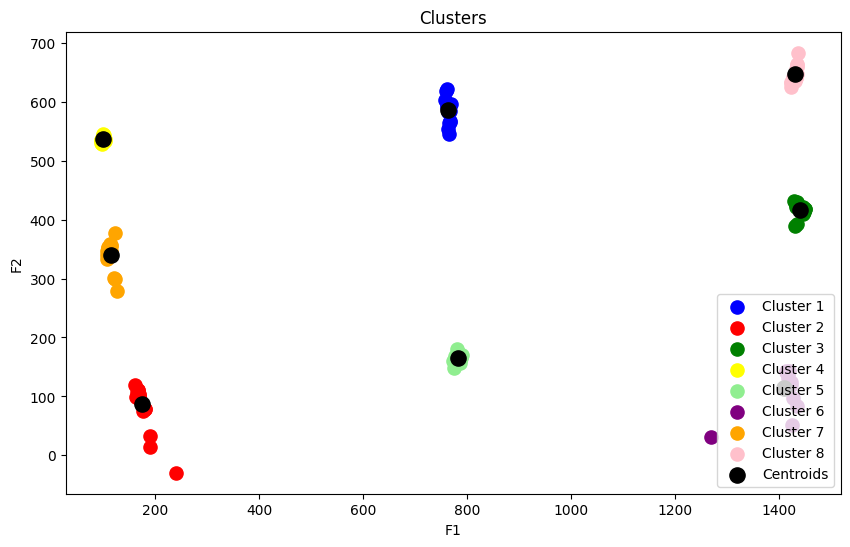

In [38]:
# Plot figure size
plt.figure(figsize=(10, 6))

# Scatter plot for the data
plt.scatter(
    data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s=90, c="blue", label="Cluster 1"
)
plt.scatter(
    data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s=90, c="red", label="Cluster 2"
)
plt.scatter(
    data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s=90, c="green", label="Cluster 3"
)
plt.scatter(
    data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s=90, c="yellow", label="Cluster 4"
)
plt.scatter(
    data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s=90, c="lightgreen", label="Cluster 5"
)
plt.scatter(
    data[y_kmeans == 5, 0], data[y_kmeans == 5, 1], s=90, c="purple", label="Cluster 6"
)
plt.scatter(
    data[y_kmeans == 6, 0], data[y_kmeans == 6, 1], s=90, c="orange", label="Cluster 7"
)
plt.scatter(
    data[y_kmeans == 7, 0], data[y_kmeans == 7, 1], s=90, c="pink", label="Cluster 8"
)
plt.scatter(
    model.cluster_centers_[:, 0],
    model.cluster_centers_[:, 1],
    s=120,
    c="black",
    label="Centroids",
)

# Plot title and labels
plt.title("Clusters")

plt.xlabel("F1")
plt.ylabel("F2")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.show()

## Testing

In [39]:
def plot(ax, y_test_x, y_pred_x, y_test_y, y_pred_y, title=None):
    """
    Plots the true and predicted points for X and Y coordinates.

    Args:
        - ax (matplotlib.axes.Axes): The axes object to plot on.
        - y_test_x (list or numpy.ndarray): The true X coordinates.
        - y_pred_x (list or numpy.ndarray): The predicted X coordinates.
        - y_test_y (list or numpy.ndarray): The true Y coordinates.
        - y_pred_y (list or numpy.ndarray): The predicted Y coordinates.
        - title (str, optional): The title of the plot. Defaults to None.

    Returns: None
    """
    # Convert the data to numpy arrays
    y_test_x = np.array(y_test_x)
    y_test_y = np.array(y_test_y)

    # True points as a list of tuples
    true_points = [(y_test_x[i], y_test_y[i]) for i in range(len(y_test_x))]

    # Define the error range
    error_range = 0.05

    # Create a DataFrame with the true and predicted values
    data = {
        "True X": y_test_x,
        "Predicted X": y_pred_x,
        "True Y": y_test_y,
        "Predicted Y": y_pred_y,
    }

    # Plot the true and predicted points for X and Y
    sns.scatterplot(
        x="True X",
        y="True Y",
        data=data,
        label="True Values",
        alpha=0.7,
        ax=ax,
        color="red",
    )
    sns.scatterplot(
        x="Predicted X",
        y="Predicted Y",
        data=data,
        label="Predicted Values",
        alpha=0.7,
        ax=ax,
        color="green",
    )

    # Calculate the circle radius
    circle_radius = (
        error_range
        * (max(y_test_x) - min(y_test_x) + max(y_test_y) - min(y_test_y))
        / 2
    )

    # Iterate over the true points
    for true_x, true_y in true_points:

        # Get the predicted values within the error range
        x_within_range = [
            y_pred_x[j]
            for j in range(len(y_test_x))
            if abs(y_test_x[j] - true_x) <= error_range
        ]
        y_within_range = [
            y_pred_y[j]
            for j in range(len(y_test_y))
            if abs(y_test_y[j] - true_y) <= error_range
        ]

        # If there are more than one predicted values within the error range
        if len(x_within_range) > 1 and len(y_within_range) > 1:

            # Calculate the combined predictions and true values
            combined_predictions = x_within_range + y_within_range
            combined_true = [true_x] * len(x_within_range) + [true_y] * len(
                y_within_range
            )

            # Calculate the R2 score and MAE for the combined values
            r2_combined = r2_score(combined_true, combined_predictions)
            mae_combined = mean_absolute_error(combined_true, combined_predictions)

            # Create a circle patch
            circle = plt.Circle(
                (true_x, true_y), circle_radius, color="yellow", fill=False
            )

            # Add the circle to the plot
            ax.add_patch(circle)
            ax.text(
                true_x + 0.1,
                true_y + 0.1,
                f"R2={r2_combined:.2f}\nMAE={mae_combined:.2f}",
                fontsize=8,
                color="blue",
            )

    # Set the title and legend
    title = title if title else "True and Predicted Points for X and Y"
    ax.set_title(title)
    ax.legend()

In [40]:
def analysis(df, ax=None, title=None):
    """
    Perform analysis on the given DataFrame.

    Args:
        - df (DataFrame): The input DataFrame containing the data for analysis.
        - ax (AxesSubplot, optional): The subplot to plot the analysis results on.
        - title (str, optional): The title of the plot.

    Returns: None
    """
    # Initialize the StandardScaler and SVR model
    # with 2-degree polynomial features
    sc = StandardScaler()
    model = make_pipeline(PolynomialFeatures(2), SVR())

    # Define the parameter grid for GridSearchCV
    param_grid = {
        "svr__C": [0.1, 1, 10, 100, 1000],
        "svr__gamma": [0.0001, 0.001, 0.01, 0.1, 1],
        "svr__kernel": ["linear", "rbf", "poly"],
    }

    # Set the scoring metrics for GridSearchCV to r2_score and mean_absolute_error
    scoring = {
        "R2": make_scorer(r2_score),
        "MAE": make_scorer(mean_absolute_error),
    }

    # Initialize GridSearchCV with the model and parameter grid
    grid_search = GridSearchCV(
        model, param_grid, cv=5, scoring=scoring, refit="R2", n_jobs=-1
    )

    """For Left Iris X and Right Iris X model training and testing"""
    # Left iris X and right iris X
    X_x = df[["left_iris_x", "right_iris_x"]]
    X_y = df["point_x"]

    # Transform the data by standardizing it
    X_x = sc.fit_transform(X_x)

    # Split the data into training and testing sets
    X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(
        X_x, X_y, test_size=0.2, random_state=42
    )

    # Fit the model to the training data for X using GridSearchCV
    grid_search.fit(X_train_x, y_train_x)

    # Use the best model to predict the values and calculate the R2 score
    best_model_x = grid_search.best_estimator_
    y_pred_x = best_model_x.predict(X_test_x)
    r2_score_x = r2_score(y_test_x, y_pred_x)
    print("-------------------MODEL RESULT FOR X------------------")
    print(
        f'Best C for X: {grid_search.best_params_["svr__C"]}, Best gamma for X: {grid_search.best_params_["svr__gamma"]}, Best kernel for X: {grid_search.best_params_["svr__kernel"]}, R2 score : {r2_score_x}'
    )
    print("-------------------------------------------------------")

    """For Left Iris Y and Right Iris Y model training and testing"""
    # Left iris Y and right iris Y
    X_y = df[["left_iris_y", "right_iris_y"]]
    y_y = df["point_y"]

    # Transform the data by standardizing it
    X_y = sc.fit_transform(X_y)

    # Split the data into training and testing sets
    X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(
        X_y, y_y, test_size=0.2, random_state=42
    )

    # Fit the model to the training data for Y using GridSearchCV
    grid_search.fit(X_train_y, y_train_y)

    # Use the best model to predict the values and calculate the R2 score
    best_model_y = grid_search.best_estimator_
    y_pred_y = best_model_y.predict(X_test_y)
    r2_score_y = r2_score(y_test_y, y_pred_y)
    print("-------------------MODEL RESULT FOR Y------------------")
    print(
        f'Best C for Y: {grid_search.best_params_["svr__C"]}, Best gamma for Y: {grid_search.best_params_["svr__gamma"]}, Best kernel for Y: {grid_search.best_params_["svr__kernel"]}, R2 score : {r2_score_y}'
    )
    print("-------------------------------------------------------")

    # Plot the true and predicted points for X and Y
    plot(ax, y_test_x, y_pred_x, y_test_y, y_pred_y, title)

-------------------MODEL RESULT FOR X------------------
Best C for X: 1000, Best gamma for X: 1, Best kernel for X: poly, R2 score : 0.9960671583695893
-------------------------------------------------------
-------------------MODEL RESULT FOR Y------------------
Best C for Y: 1000, Best gamma for Y: 1, Best kernel for Y: rbf, R2 score : 0.9998572969740602
-------------------------------------------------------


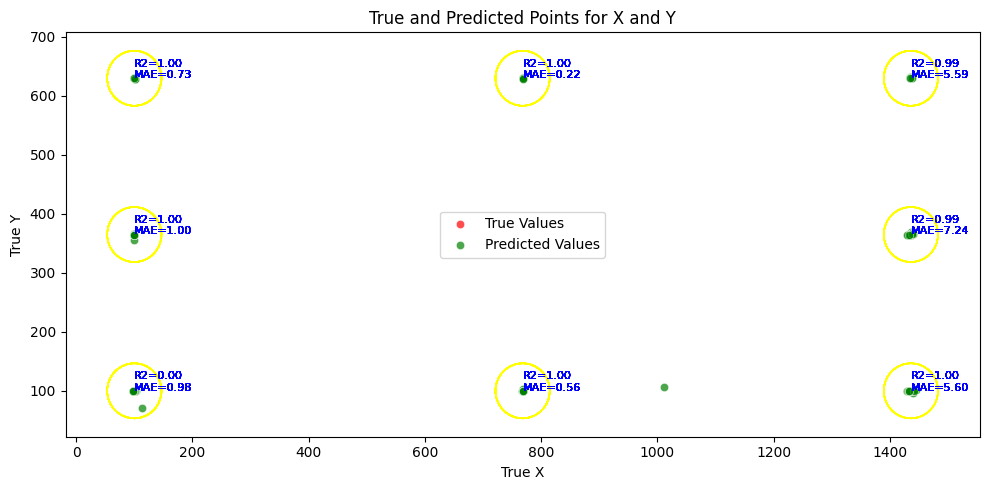

In [41]:
# Load the data from the calibrations csv file
df = pd.read_csv(rf"C:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\app\services\calib_validation\csv\data\{prefix}_fixed_train_data.csv")
df = df.drop(["screen_height", "screen_width"], axis=1)

# Create a list of DataFrames
df_list = [df]

# num_rows = len(df_list) // 2 + len(df_list) % 2
# num_cols = min(2, len(df_list))

# Calculate the number of rows and columns
num_rows = len(df_list)
num_cols = 1

# Create a figure and axes
fig_height = 5 * num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, fig_height), squeeze=False)

# Iterate over the DataFrames
for i, df in enumerate(df_list):

    # row_idx = i // num_cols
    # col_idx = i % num_cols

    row_idx = i
    col_idx = 0

    ax = axes[row_idx, col_idx]

    # Perform the analysis
    analysis(df, ax)

# Plot the data
plt.tight_layout()
plt.show()